In [1]:
import transformers

## Tokenize text

In [2]:
from transformers import AutoTokenizer
from datasets import load_dataset

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
dataset = load_dataset("rotten_tomatoes", split="train")

In [3]:
tokenizer(dataset[0]["text"])

{'input_ids': [101, 1103, 2067, 1110, 17348, 1106, 1129, 1103, 6880, 1432, 112, 188, 1207, 107, 14255, 1389, 107, 1105, 1115, 1119, 112, 188, 1280, 1106, 1294, 170, 24194, 1256, 3407, 1190, 170, 11791, 5253, 188, 1732, 7200, 10947, 12606, 2895, 117, 179, 7766, 118, 172, 15554, 1181, 3498, 6961, 3263, 1137, 188, 1566, 7912, 14516, 6997, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

The fastest way to tokenize your entire dataset is to use the `map()` function

In [4]:
def tokenization(example):
    return tokenizer(example["text"])

dataset = dataset.map(tokenization, batched=True)

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

In [5]:
dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 8530
})

Set the format of your dataset to be compatible with your machine learning framework:

In [6]:
dataset.set_format(type="torch", columns=["input_ids", "token_type_ids","attention_mask", "label"])

## Apply data augmentation

In [7]:
from transformers import AutoFeatureExtractor
from datasets import load_dataset

feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
dataset = load_dataset("beans", split="train")

/home/mpp/miniconda3/envs/ray-torch/lib/python3.9/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

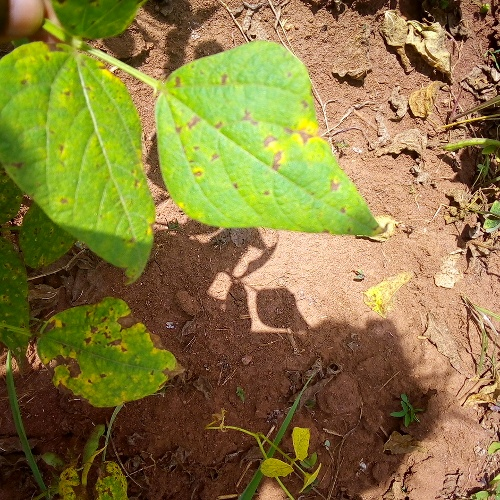

In [8]:
dataset[0]['image']

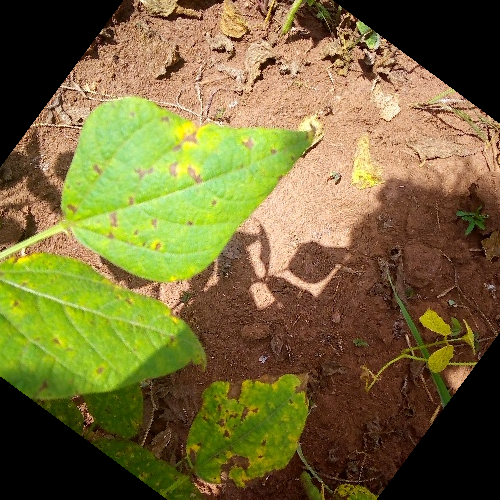

In [9]:
from torchvision.transforms import RandomRotation

rotate = RandomRotation(degrees=(0, 90))

def transforms(examples):
    examples['pixel_values'] = [rotate(image.convert("RGB")) for image in examples["image"]]
    return examples

dataset.set_transform(transforms)
dataset[0]['pixel_values']